<a href="https://colab.research.google.com/github/taizyayyamba-dev/data-mining-group-33/blob/main/DATA_MINING_GROUP_33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#data-mining-group-33
##assignment on Moodle

###data minning assignment

#Business Understanding (Draft for JoNAS Project)
##Problem Statement

The Journal of Natural Sciences (JoNAS), hosted by the University of Zambia, publishes a wide range of research articles across different disciplines of natural sciences. Currently, articles are archived online with minimal metadata, making it difficult for researchers, students, and librarians to quickly identify which field (e.g., Biology, Chemistry, Environmental Science, Physics, Agriculture) a paper belongs to. This lack of structured categorization reduces discoverability, hinders cross-disciplinary research, and increases the workload of editors and readers who must manually scan articles.
We aim to build a system that automatically classifies articles into scientific fields based on their content, improving discoverability and supporting efficient indexing for the JoNAS archive.

##Business Objectives

Improve the discoverability of articles in JoNAS by automatically tagging them with relevant fields.

Reduce manual workload of editors and librarians in organizing submissions.

Support students and researchers in finding relevant literature more quickly.

Lay the foundation for potential future features, such as article recommendation or citation impact prediction.

Primary Stakeholders & Decisions:

Owner: Journal Editorial Board (JoNAS, University of Zambia).

Users: Researchers, students, and librarians accessing the archive.

Decisions influenced: How articles are categorized, displayed, and searched in the online journal system.

##Data Mining Goals

Classification: Build a supervised model to predict the field of study of an article (e.g., Biology, Chemistry, Environmental Science, Physics, Agriculture) based on text features such as title, abstract, and keywords.

Regression/Forecasting: Predict potential citation impact or readership of articles.

Explainability: Provide interpretable outputs (e.g., feature importance, keywords driving classification) so editors understand why an article was assigned to a given category.

Inputs (initial hypothesis):

Features: article titles, abstracts, keywords, metadata from JoNAS archive.

Grain of data: article-level (one row per article).

Data availability: existing JoNAS issues (static, batch download).

##Initial Project Success Criteria

Technical:

Classification model achieves ≥ 80% accuracy and ≥ 0.75 F1 score in predicting correct field labels.

Baseline benchmark: majority class classifier accuracy.

Explainability available through word importance visualization.

Business:

Article classification reduces manual tagging workload by at least 50% for editors.

Categorized articles improve searchability (demonstrated through prototype search by field).

Outputs can be integrated into a one-page metadata summary for JoNAS archive.

##Scope, Assumptions & Constraints

In-scope: Research articles in JoNAS archive (titles, abstracts, keywords).

Out-of-scope: Full-text parsing of PDFs; non-Natural Science articles.

Assumptions: Abstracts and metadata are available and clean enough for classification.

Constraints: Potentially small dataset; imbalanced categories; metadata inconsistencies.

Ethics & Privacy: No personal or sensitive data—only published research. Ensure transparency in how classifications are assigned.

##Stakeholders & RACI

Responsible (builders): Taizya, Adel, Reginald, Royd, Gift

Accountable: Course Instructor/TA

Consulted: JoNAS editors (hypothetical domain experts)

Informed: University research community

##Risks & Mitigations

Small or imbalanced dataset → Use data augmentation or resampling.

Noisy or inconsistent article metadata → Apply text preprocessing (cleaning, tokenization).

Overfitting due to limited categories → Use cross-validation and simpler interpretable models initially.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = "/content/drive/MyDrive/colab_notebook/misc-unza25-csc4792-project_team33/jonas_articles.csv"
df = pd.read_csv(file_path)
print(df.head())

                            article_id                          title  \
0  371-Article Text-1361-1-10-20201218  JONAS Volume 4 Issue 1 (2020)   
1  374-Article Text-1371-1-10-20201218  JONAS Volume 4 Issue 1 (2020)   
2  376-Article Text-1364-1-10-20201218  JONAS Volume 4 Issue 1 (2020)   
3  378-Article Text-1374-1-10-20201218  JONAS Volume 4 Issue 1 (2020)   
4  378-Article Text-1377-1-10-20201218  JONAS Volume 4 Issue 1 (2020)   

   authors  year  volume  issue  pages  \
0      NaN   NaN     NaN    NaN    NaN   
1      NaN   NaN     NaN    NaN    NaN   
2      NaN   NaN     NaN    NaN    NaN   
3      NaN   NaN     NaN    NaN    NaN   
4      NaN   NaN     NaN    NaN    NaN   

                                            keywords  \
0                                                NaN   
1                                                NaN   
2  Operations Strategy, Competency, Cost, Quality...   
3  Construction Indusry, Main contractor, Subcont...   
4  Construction Indusry, Mai

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/misc-unza25-csc4792-project_team33/jonas_articles.csv')

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
exclude_cols = ['abstract', 'pdf_path']
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['authors', 'year', 'volume', 'issue', 'pages', 'abstract_length',
       'field'],
      dtype='object')
Categorical columns: ['article_id', 'title', 'keywords']


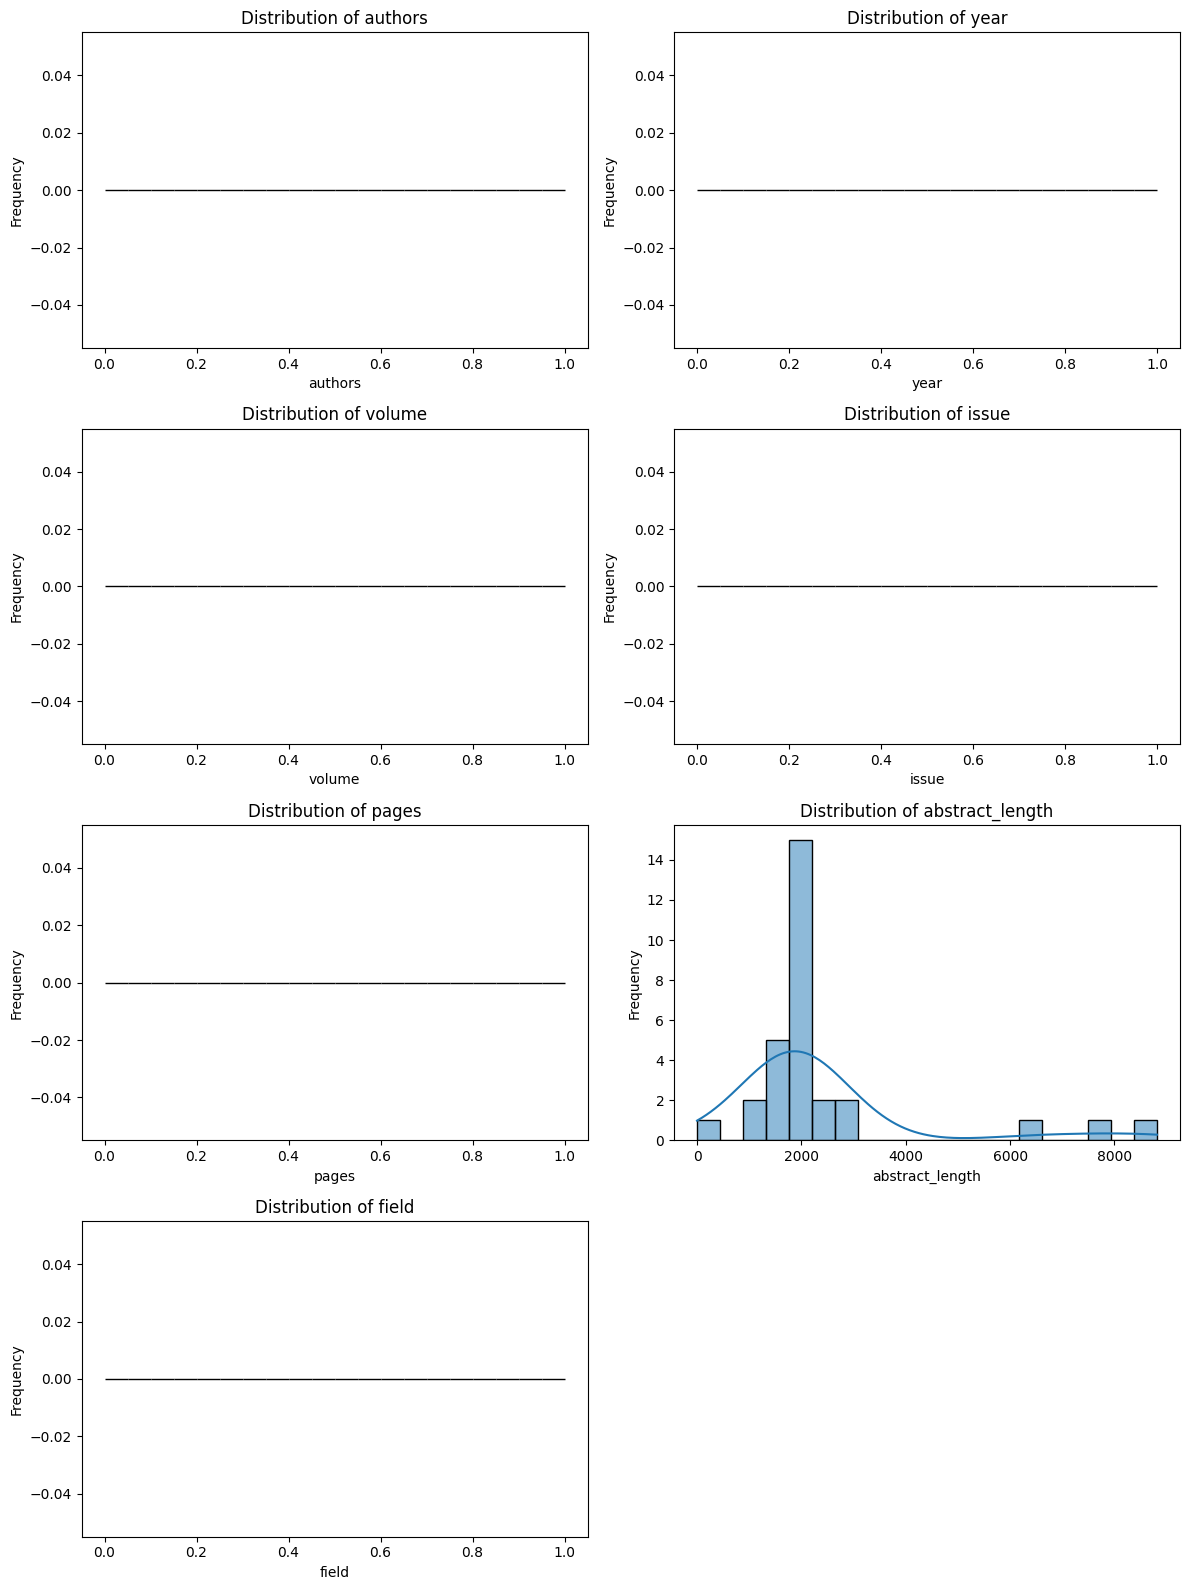

In [ ]:
num_cols = len(numerical_cols)

n_cols = 2
n_rows = math.ceil(num_cols / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

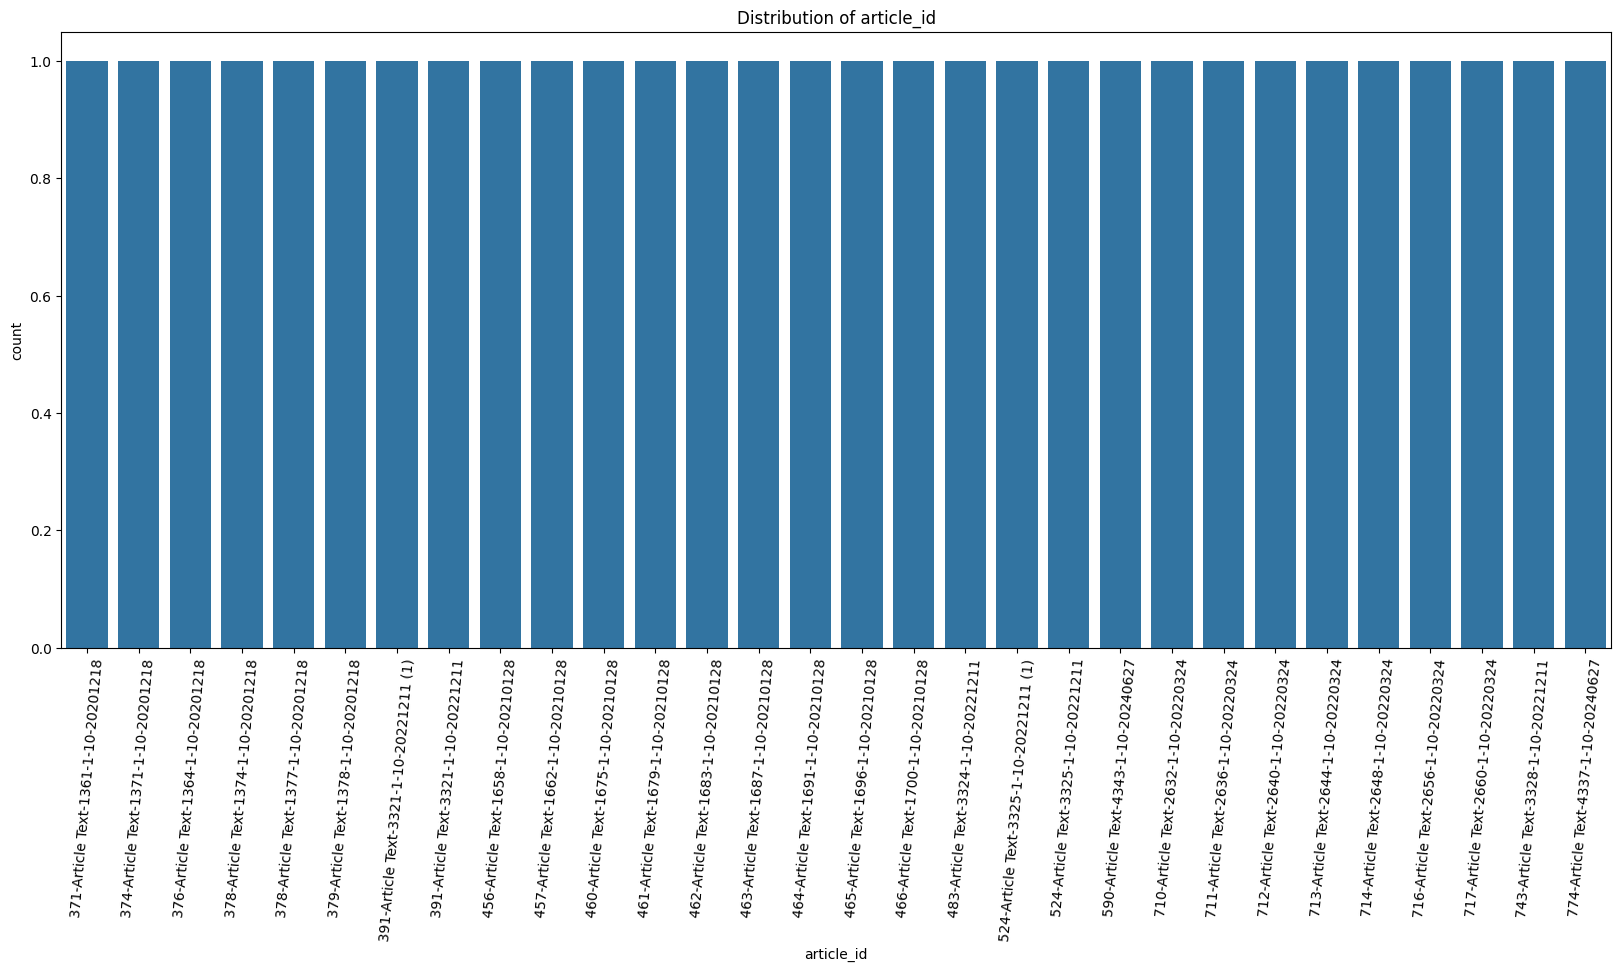

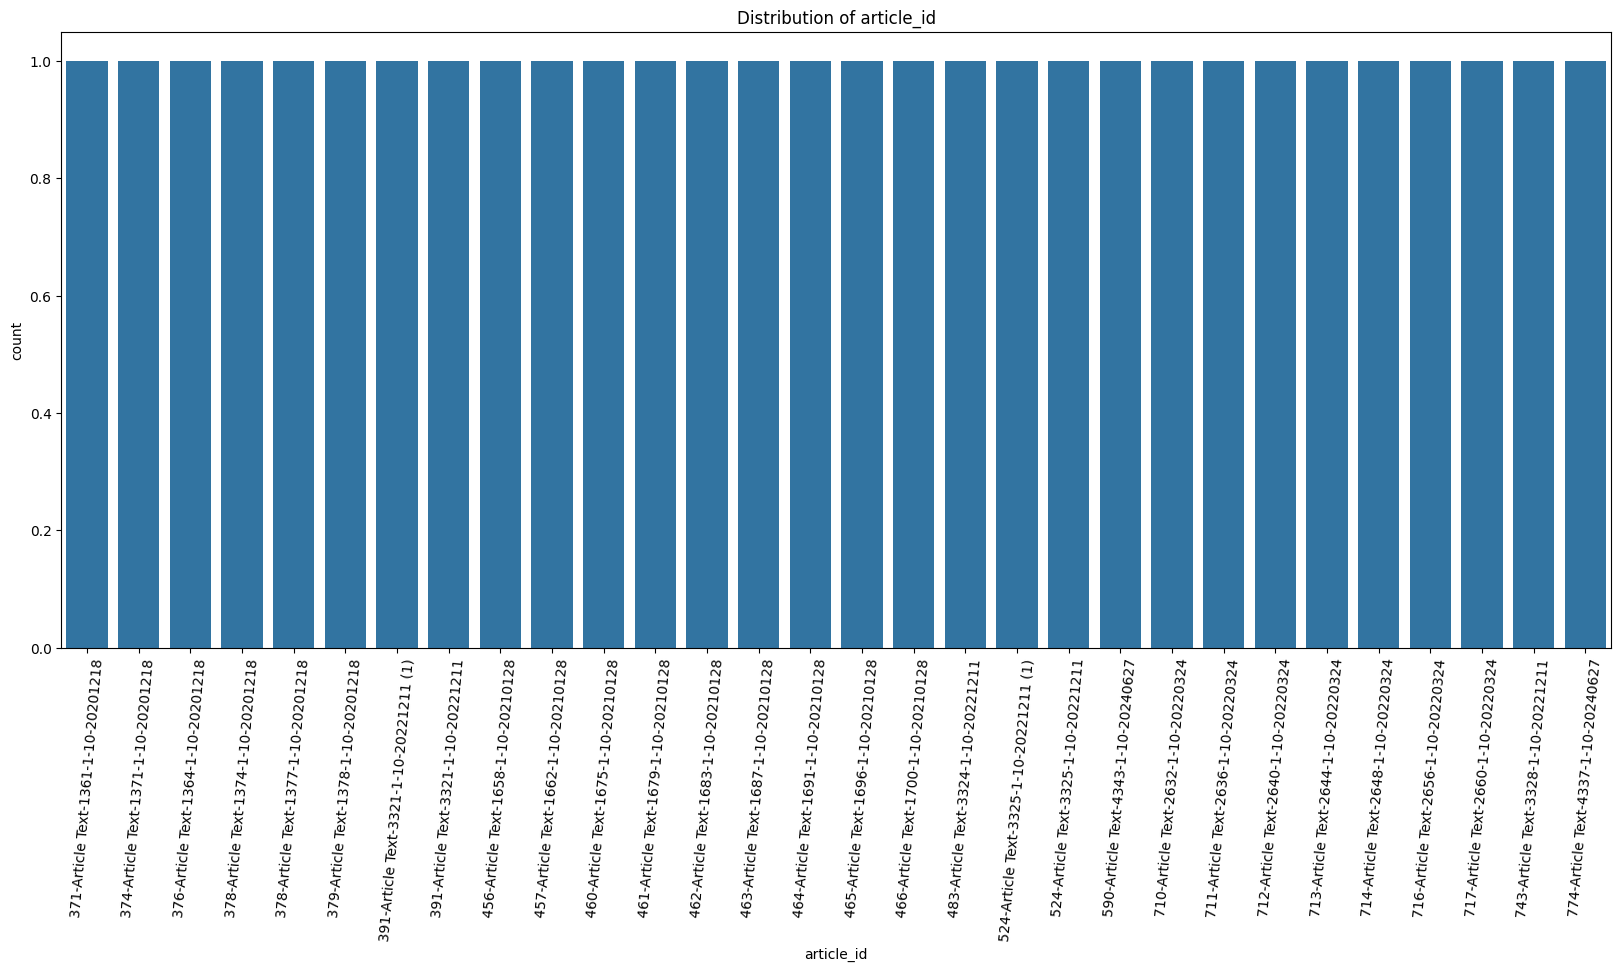

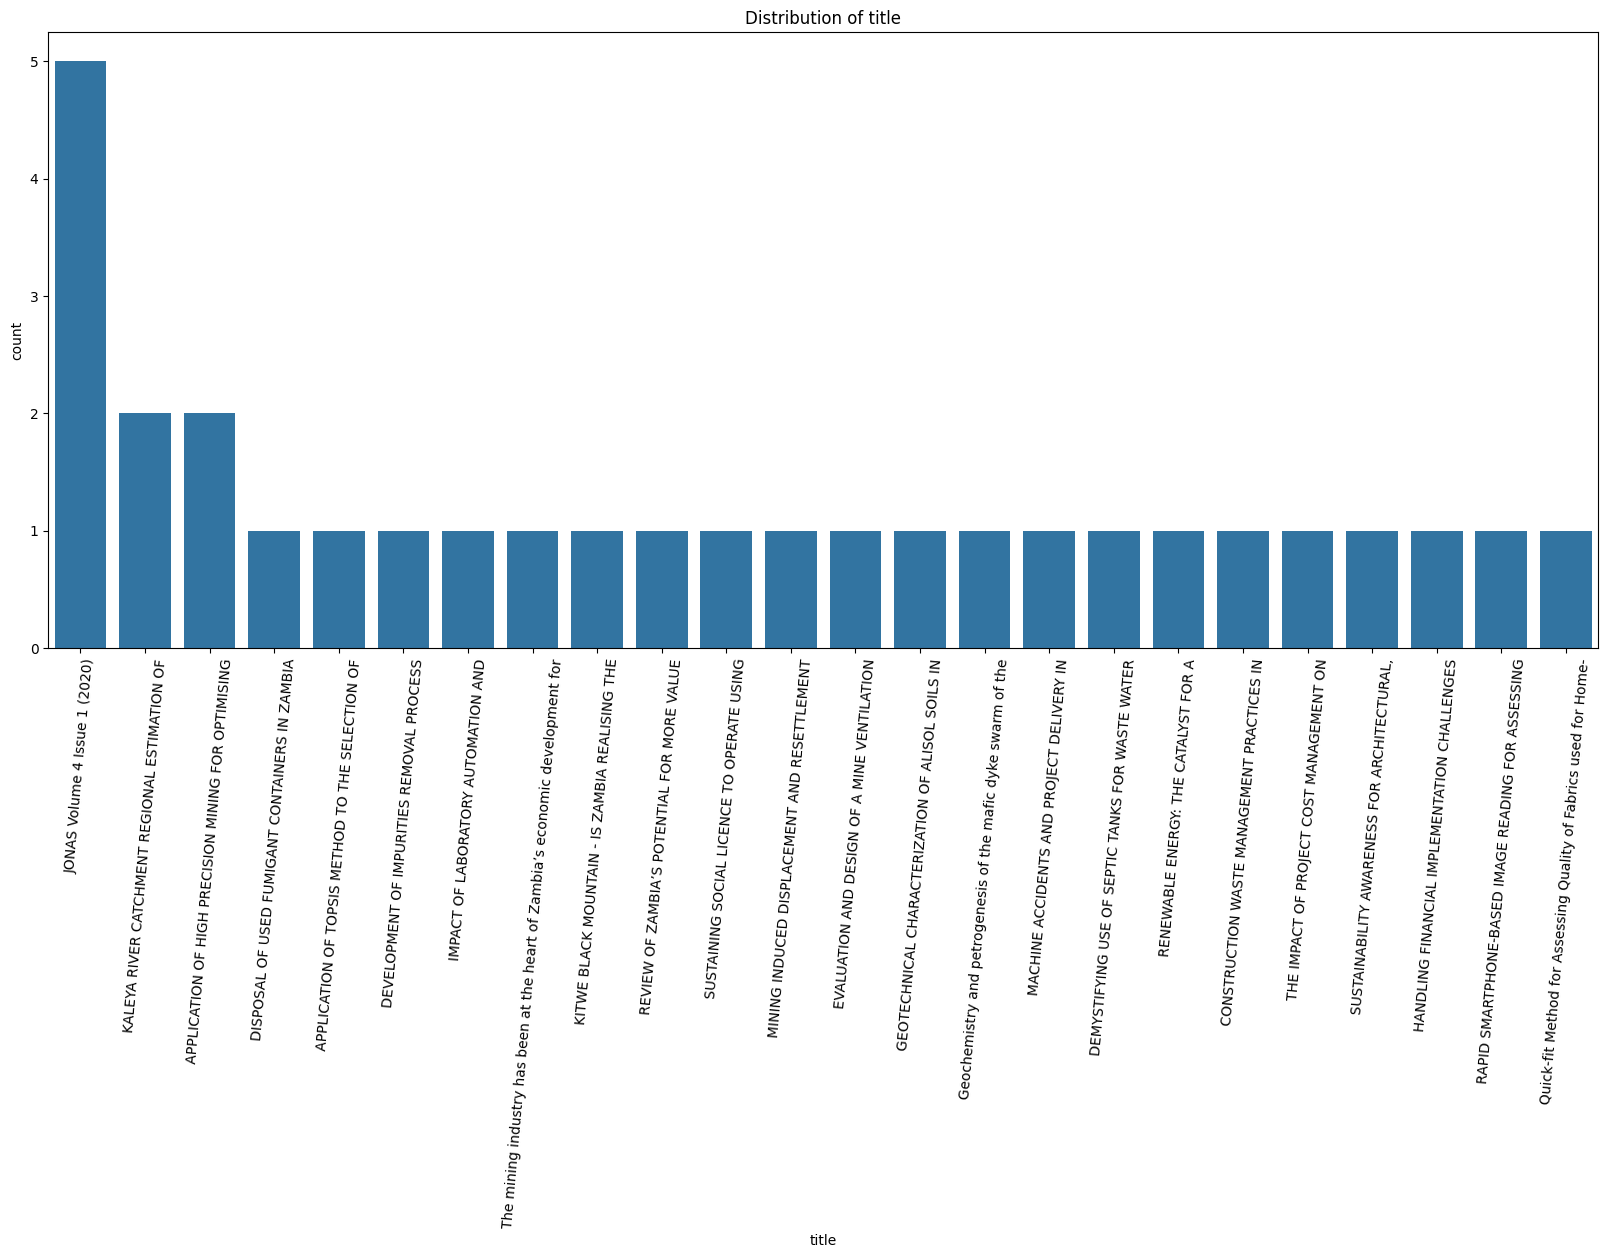

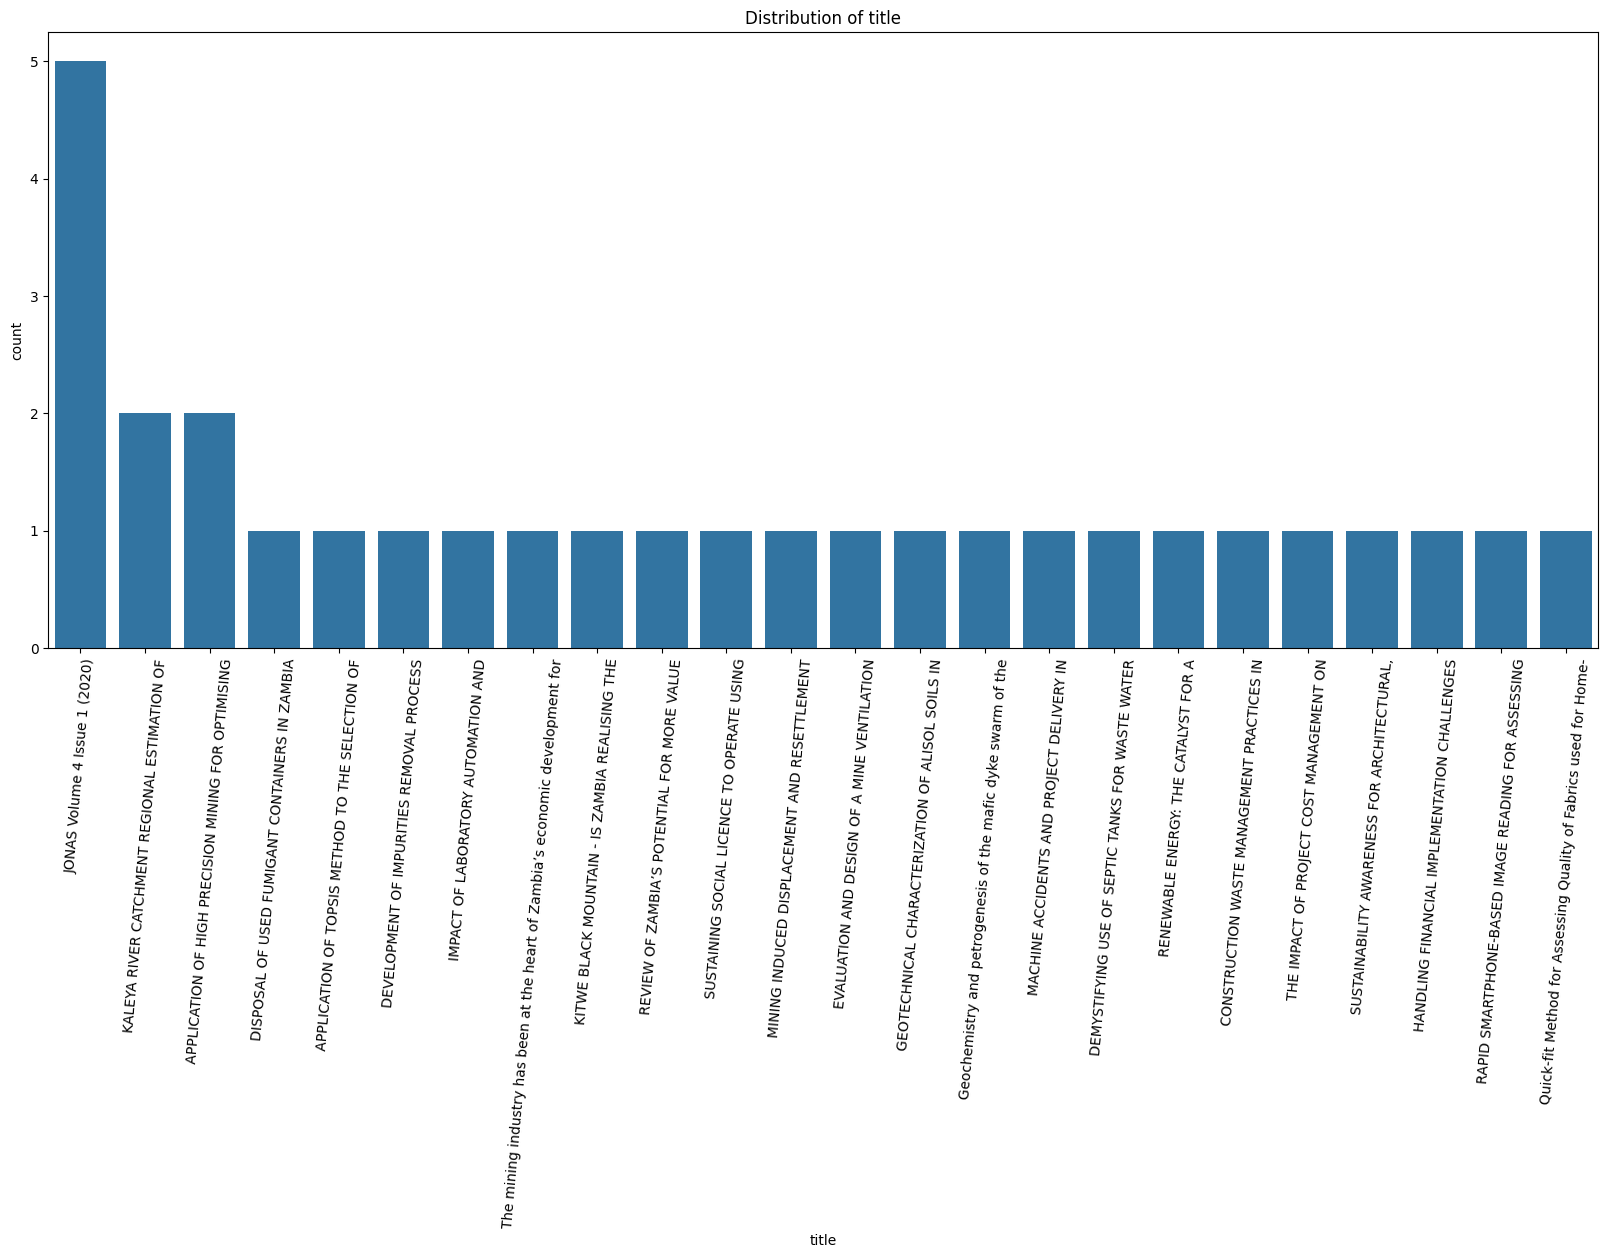

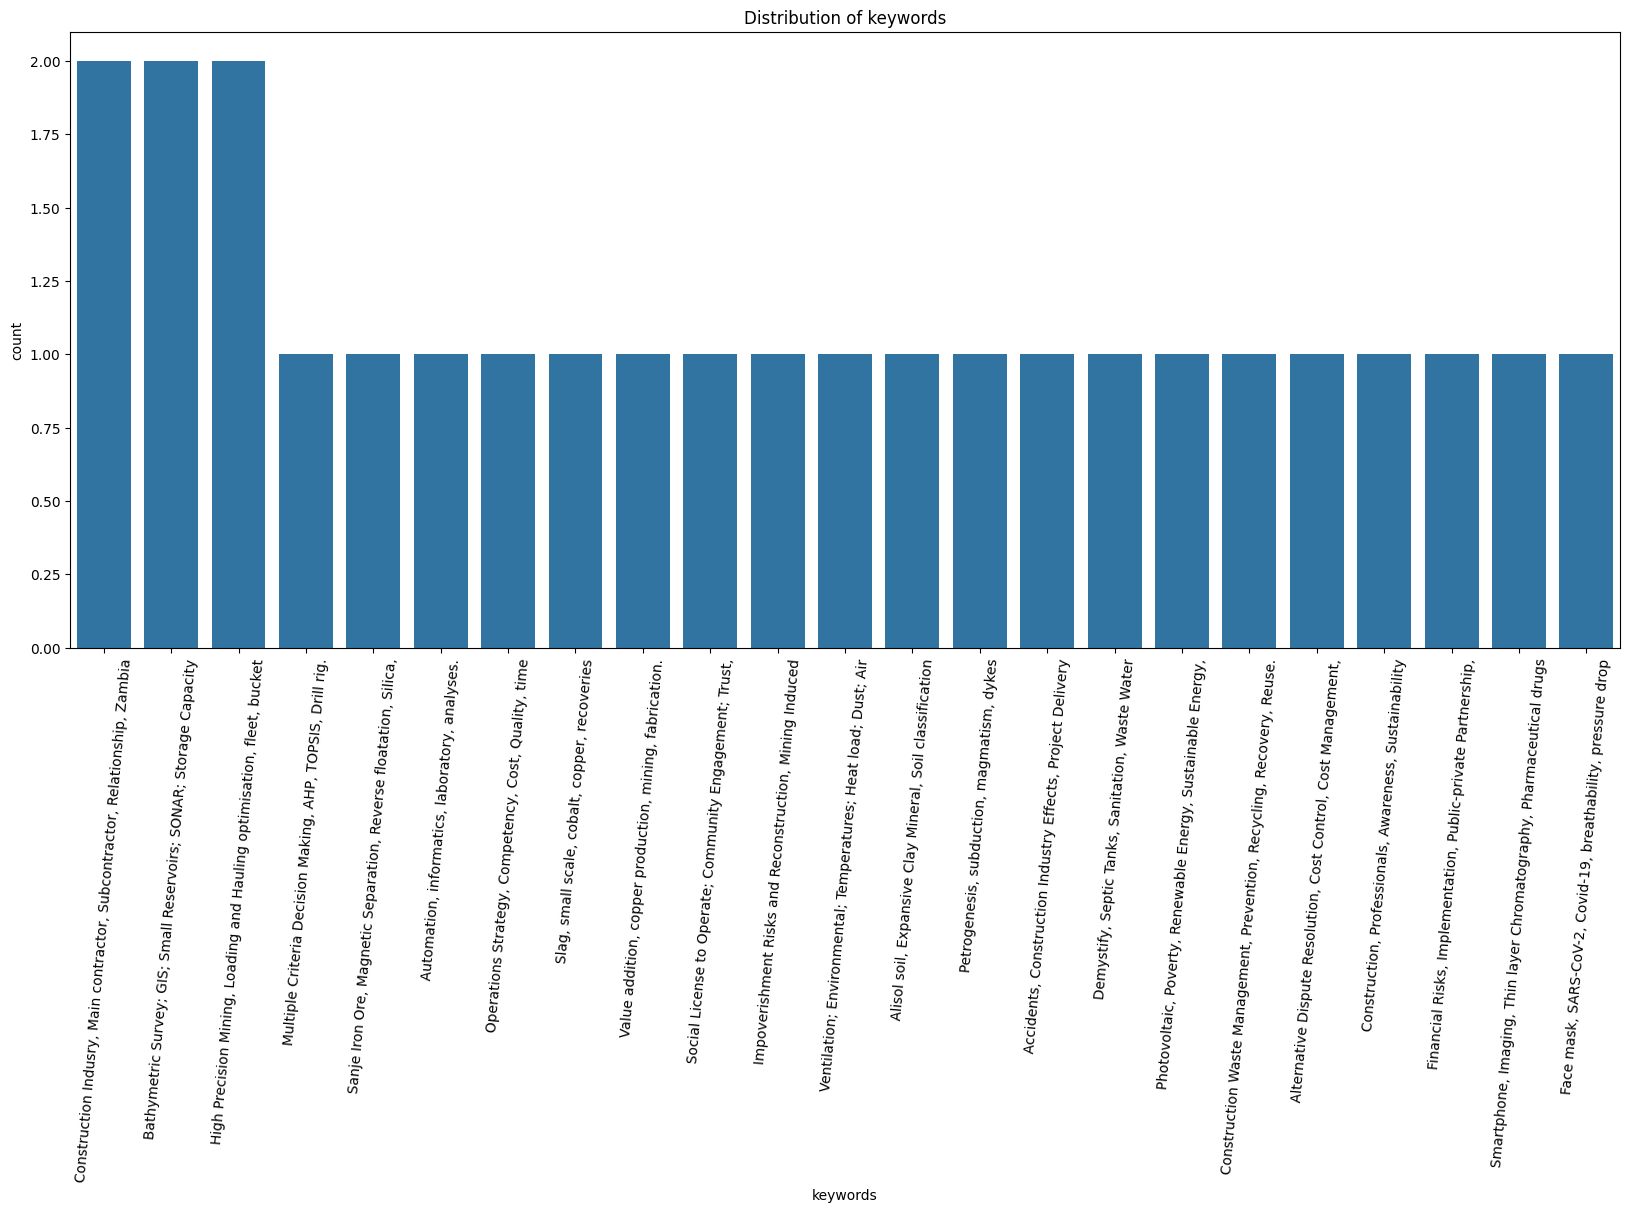

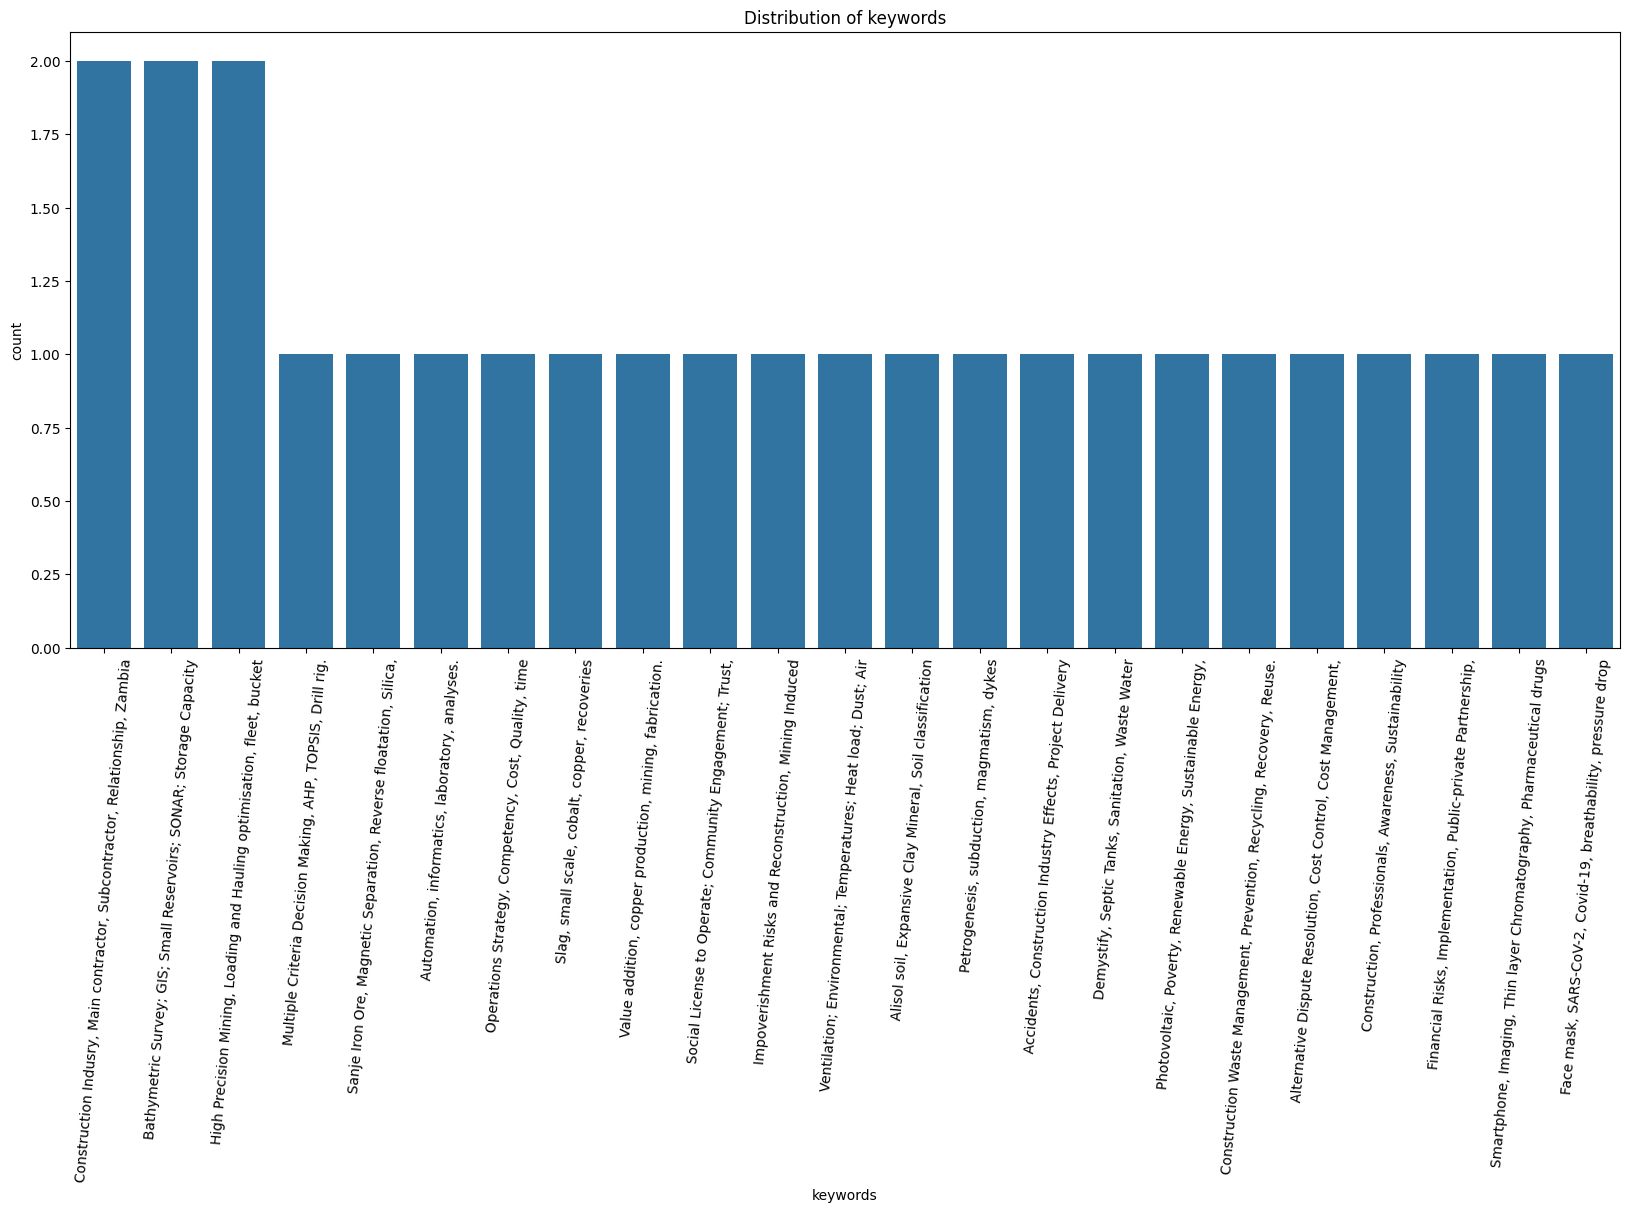

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(20,8))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=85)
    display(plt.gcf())
    plt.show()

In [3]:
# 3. Data Preparation (Tasks 1 & 2)

import pandas as pd
import numpy as np
import re

# Load dataset
file_path = "/content/drive/MyDrive/colab_notebook/misc-unza25-csc4792-project_team33/jonas_articles.csv"
df = pd.read_csv(file_path)

print("Original shape:", df.shape)
print(df.head())


# TASK 1: DATA CLEANING


# Drop rows with no title or abstract
df = df.dropna(subset=['title', 'abstract'])
print("After dropping missing title/abstract:", df.shape)

# Fill missing keywords with empty string
df['keywords'] = df['keywords'].fillna('')

# Fill missing year with 'Unknown'
df['year'] = df['year'].fillna('Unknown')

# Normalize text (title & abstract)
def clean_text(text):
    text = str(text).lower()                     # lowercase
    text = re.sub(r'[^a-z\s]', '', text)        # remove non-alphabetic chars
    text = re.sub(r'\s+', ' ', text).strip()    # remove extra spaces
    return text

df['title_clean'] = df['title'].apply(clean_text)
df['abstract_clean'] = df['abstract'].apply(clean_text)


# TASK 2: FEATURE ENGINEERING


# Abstract length (word count)
df['abstract_length'] = df['abstract_clean'].apply(lambda x: len(x.split()))

# Keyword count
df['keyword_count'] = df['keywords'].apply(lambda x: len(x.split(',')) if x else 0)

print("Sample after cleaning and feature engineering:")
print(df.head())

# Save cleaned data for modeling
df.to_csv("/content/drive/MyDrive/colab_notebook/misc-unza25-csc4792-project_team33/jonas_articles_prepared.csv", index=False)
print("Cleaned dataset saved.")


Original shape: (30, 12)
                            article_id                          title  \
0  371-Article Text-1361-1-10-20201218  JONAS Volume 4 Issue 1 (2020)   
1  374-Article Text-1371-1-10-20201218  JONAS Volume 4 Issue 1 (2020)   
2  376-Article Text-1364-1-10-20201218  JONAS Volume 4 Issue 1 (2020)   
3  378-Article Text-1374-1-10-20201218  JONAS Volume 4 Issue 1 (2020)   
4  378-Article Text-1377-1-10-20201218  JONAS Volume 4 Issue 1 (2020)   

   authors  year  volume  issue  pages  \
0      NaN   NaN     NaN    NaN    NaN   
1      NaN   NaN     NaN    NaN    NaN   
2      NaN   NaN     NaN    NaN    NaN   
3      NaN   NaN     NaN    NaN    NaN   
4      NaN   NaN     NaN    NaN    NaN   

                                            keywords  \
0                                                NaN   
1                                                NaN   
2  Operations Strategy, Competency, Cost, Quality...   
3  Construction Indusry, Main contractor, Subcont...   
4  